In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Perceptron     
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [23]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Classs labels: ', np.unique(y))

Classs labels:  [0 1 2]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [25]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [26]:
ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.1, n_iter_no_change=40, random_state=1)

In [27]:
y_pred = ppn.predict(X_test_std)

In [28]:
accuracy_score(Y_test,y_pred)

0.8222222222222222

In [29]:
ppn.score(X_test_std, Y_test)

0.8222222222222222

In [31]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # define generador de marcador y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # representa la superficie de decisión 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # destaca las muestras de prueba 
    if test_idx:
        # representa todas las muestras 
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')



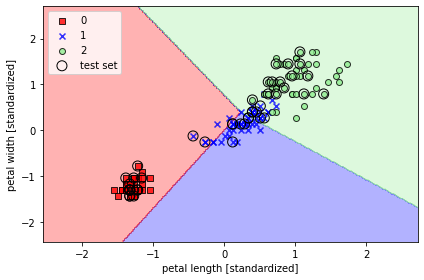

In [32]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))

plot_decision_regions(X=X_combined_std, y=Y_combined,
                     classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()